In [3]:
!pip install kagglehub
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
distutils: /users/PZS0694/krishsanghvi/.local/lib/python3.9/site-packages
sysconfig: /users/PZS0694/krishsanghvi/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /users/PZS0694/krishsanghvi/.local/lib/python3.9/site-packages
sysconfig: /users/PZS0694/krishsanghvi/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [2]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

animal_clef_2025_path = kagglehub.competition_download('animal-clef-2025')

print('Data source import complete.')


Data source import complete.


In [6]:
animal_clef_2025_path

'/users/PZS0694/krishsanghvi/.cache/kagglehub/competitions/animal-clef-2025'

In [4]:
from kagglehub import KaggleDatasetAdapter
import os, shutil, pandas as pd
from tqdm import tqdm
# Krish


HANDLE     = "wildlifedatasets/wildlifereid-10k"   # dataset slug
FILE_PATH  = "metadata.csv"                        # <-- key change

df = kagglehub.dataset_load(                      # use *dataset_load* not load_dataset
        KaggleDatasetAdapter.PANDAS,
        HANDLE,
        FILE_PATH,
)

# print(df.shape)
# df


# reuse the same handle you used before
HANDLE = "wildlifedatasets/wildlifereid-10k"

# ➊ make sure we have a local copy of the _entire_ dataset
DATA_ROOT = kagglehub.dataset_download(HANDLE)      # e.g. /root/.cache/kagglehub/...

# ➋ keep only train split & drop unwanted species
exclude_species = {"sea turtle", "lynx", "salamander"}
wildlife_df = (
    df[df["split"] == "train"]
    .loc[~df["species"].str.lower().isin(exclude_species)]
    .sample(n=30_000, random_state=42)              # reproducible shuffle
    .reset_index(drop=True)
)

# Rename column
wildlife_df = wildlife_df.rename(columns={"path": "image_path"})


for species, src_path in species_paths.items():
    dst_path = os.path.join(new_dataset_path, species)
    os.makedirs(dst_path, exist_ok=True)

    # For turtles: handle nested subdirs like t001, t002, ...
    
    for subdir in os.listdir(src_path):
        full_subdir = os.path.join(src_path, subdir)
        if os.path.isdir(full_subdir):
            for img in os.listdir(full_subdir):
                if img.lower().endswith(('.jpg', '.jpeg', '.png')):
                    src_img_path = os.path.join(full_subdir, img)
                    dst_img_name = f"{subdir}_{img}"
                    dst_img_path = os.path.join(dst_path, dst_img_name)
                    shutil.copy(src_img_path, dst_img_path)
                    image_records.append([dst_img_path, species])
# Make every species as unknown
wildlife_df["species"] = "new_individual"      # in‑place update of every row
# Keep only ['image_path', 'species'] columns
wildlife_df = wildlife_df[['image_path', 'species']]



# Species that are "unknown" are from Wildlife dataset
# print(df.shape)
# df.head()
#image in column 1, class in column 2
#120000 x 2 data frame, 1st part is images, 2nd is class/label

/users/PZS0694/krishsanghvi/.local/lib/python3.9/site-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [5]:
# Move all data to training_data

DEST_ROOT = "training_data/unknown"
os.makedirs(DEST_ROOT, exist_ok=True)

# 2⃣  helper that builds a unique filename:  parentdir_filename.jpg
def make_unique_name(rel_path: str) -> str:
    parent, fname = rel_path.split("/")[-2:]         # e.g. b001, img_123.jpg
    return f"{parent}_{fname}"

# 3⃣  copy images & collect new paths
new_paths = []
for rel_path in tqdm(wildlife_df["image_path"], desc="Copying images"):
    src = os.path.join(DATA_ROOT, rel_path)          # absolute source path
    dst_name = make_unique_name(rel_path)
    dst = os.path.join(DEST_ROOT, dst_name)
    shutil.copy2(src, dst)                           # keeps metadata
    new_paths.append(os.path.join("training_data/unknown", dst_name))

# 4⃣  update the DataFrame
wildlife_df["image_path"] = new_paths

print("All images now live under:", DEST_ROOT)
print(wildlife_df.head())

print("new wildlife set:", wildlife_df.shape)
wildlife_df.head()
wildlife_df.to_csv("training_data/unknown_index.csv", index=False)


Copying images:   2%|▏         | 571/30000 [00:05<04:54, 99.78it/s] 


KeyboardInterrupt: 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import os
import shutil
import pandas as pd

metadata_path = '/users/PZS0694/krishsanghvi/.cache/kagglehub/competitions/animal-clef-2025/metadata.csv'
metadata_df = pd.read_csv(metadata_path)
metadata_df['path'] = metadata_df['path'].str.strip()

# Map from relative path to identity
path_to_identity = dict(zip(metadata_df['path'], metadata_df['identity']))

#/users/PZS0694/krishsanghvi/.cache/kagglehub/competitions/animal-clef-2025
species_paths = {
    'lynx':       '/users/PZS0694/krishsanghvi/.cache/kagglehub/competitions/animal-clef-2025/images/LynxID2025/database',
    'salamander': '/users/PZS0694/krishsanghvi/.cache/kagglehub/competitions/animal-clef-2025/images/SalamanderID2025/database/images',
    'turtle':     '/users/PZS0694/krishsanghvi/.cache/kagglehub/competitions/animal-clef-2025/images/SeaTurtleID2022/database/turtles-data/data/images'
}
    

new_dataset_path = 'training_data'
os.makedirs(new_dataset_path, exist_ok=True)

image_records = []

for species, src_path in species_paths.items():
    dst_path = os.path.join(new_dataset_path, species)
    os.makedirs(dst_path, exist_ok=True)

    # For turtles: handle nested subdirs like t001, t002, ...
    if species == 'turtle':
        for subdir in os.listdir(src_path):
            full_subdir = os.path.join(src_path, subdir)
            if os.path.isdir(full_subdir):
                for img in os.listdir(full_subdir):
                    if img.lower().endswith(('.jpg', '.jpeg', '.png')):
                        rel_path = f"{subdir}/{img}"
                        identity_key = f"images/SeaTurtleID2022/{rel_path}"
                        identity = path_to_identity.get(identity_key, None)
                        src_img_path = os.path.join(full_subdir, img)
                        dst_img_name = f"{subdir}_{img}"
                        dst_img_path = os.path.join(dst_path, dst_img_name)
                        shutil.copy(src_img_path, dst_img_path)
                        image_records.append([dst_img_path, identity])
    else:
        for img in os.listdir(src_path):
            if img.lower().endswith(('.jpg', '.jpeg', '.png')):
                rel_path = f"images/{species.capitalize()}ID2025/database/{img}"
                identity = path_to_identity.get(rel_path, None)
                src_img_path = os.path.join(src_path, img)
                dst_img_path = os.path.join(dst_path, img)
                shutil.copy(src_img_path, dst_img_path)
                image_records.append([dst_img_path, identity])
# Save to CSV
df = pd.DataFrame(image_records, columns=['image_path', 'identity'])
df = df.dropna(subset=['identity'])
df.to_csv('training_data/image_identity.csv', index=False)


# Print counts
for species in os.listdir(new_dataset_path):
    species_path = os.path.join(new_dataset_path, species)
    if not os.path.isdir(species_path):
        continue  # Skip files like image_species.csv
    count = len([f for f in os.listdir(species_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
    print(f"{species}: {count} images")

print(f"\nSaved metadata to training_data/image_species.csv")

KeyboardInterrupt: 

In [3]:
import os
import random
from PIL import Image
from torchvision import transforms
from tqdm import tqdm
import pandas as pd

# Set target
target_count = 30000

# Define transform
augment_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

to_pil = transforms.ToPILImage()

# Paths
base_path = 'training_data'

# Loop through each species
for species in os.listdir(base_path):
    species_path = os.path.join(base_path, species)
    if not os.path.isdir(species_path):
        continue

    # List current images
    image_files = [f for f in os.listdir(species_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    current_count = len(image_files)
    print(f"{species}: {current_count} images found.")

    # If already sufficient, skip
    if current_count >= target_count:
        print(f"✅ {species} already has {current_count} images. Skipping.")
        continue

    needed = target_count - current_count
    print(f"🔄 Augmenting {needed} images for {species}...")

    for i in tqdm(range(needed)):
        original = random.choice(image_files)
        original_path = os.path.join(species_path, original)

        try:
            base_img = Image.open(original_path).convert('RGB')
            aug_img = augment_transform(base_img)
            aug_img_pil = to_pil(aug_img)

            aug_filename = f"aug_{i}_{original}"
            aug_path = os.path.join(species_path, aug_filename)
            aug_img_pil.save(aug_path)
        except Exception as e:
            print(f"⚠️ Skipped {original} due to error: {e}")

# Build full [image_path, species] mapping
final_records = []

for species in os.listdir(base_path):
    species_path = os.path.join(base_path, species)
    if not os.path.isdir(species_path):
        continue

    for img_file in os.listdir(species_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(species_path, img_file)
            final_records.append([img_path, species])

# Save to CSV
df_all = pd.DataFrame(final_records, columns=['image_path', 'species'])
df_all.to_csv(os.path.join(base_path, 'full_image_species.csv'), index=False)

print(f"\n✅ Saved full dataset to training_data/full_image_species.csv")


salamander: 30000 images found.
✅ salamander already has 30000 images. Skipping.
unknown_old: 30000 images found.
✅ unknown_old already has 30000 images. Skipping.
lynx: 30000 images found.
✅ lynx already has 30000 images. Skipping.
turtle: 30000 images found.
✅ turtle already has 30000 images. Skipping.

✅ Saved full dataset to training_data/full_image_species.csv


In [13]:
import os
from pathlib import Path
wildlife_df["species"] = "new_individual"
def remap_path(p):
    parts = Path(p).parts              # e.g. ("data", "class42", "img001.jpg")
    tail  = parts[2:]                  # drop the first two
    return os.path.join("training_data", "unknown", *tail)

wildlife_df["image_path"] = wildlife_df["image_path"].apply(remap_path)

In [5]:
# Combine 1st and 2nd dataset - Krish



#final_df = pd.concat([df_all, wildlife_df ], ignore_index=True)
#final_df.to_csv('/content/training_data/full_image_species.csv', index=False)

final_df = df_all

final_df.shape
final_df.head(5)


,image_path,species
0,training_data/salamander/aug_8096_ed88d79c40f4...,salamander
1,training_data/salamander/aug_28136_7351da42a34...,salamander
2,training_data/salamander/aug_25760_6ca6d696858...,salamander
3,training_data/salamander/aug_22255_2ff2acc3bf3...,salamander
4,training_data/salamander/aug_6695_ee241f22458b...,salamander


Using device: cpu
Train: 8  |  Val: 4  |  Test: 8


Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Backbone frozen → only classifier head will train for now


Epoch 1:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 01 │ train‑loss 1.4585 │ val‑loss 1.4061 │ val‑acc 0.2500
✓ saved new best model


Epoch 2:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 02 │ train‑loss 1.4275 │ val‑loss 1.3850 │ val‑acc 0.5000
✓ saved new best model


Epoch 3:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 03 │ train‑loss 1.3972 │ val‑loss 1.3646 │ val‑acc 0.2500


Epoch 4:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 04 │ train‑loss 1.3677 │ val‑loss 1.3448 │ val‑acc 0.2500


Epoch 5:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 05 │ train‑loss 1.3390 │ val‑loss 1.3257 │ val‑acc 0.2500
Early stopping (no val‑improvement for 3 epochs)


Testing:   0%|          | 0/1 [00:00<?, ?it/s]


Test Classification Report:
                    precision    recall  f1-score   support

LynxID2025_lynx_43       1.00      0.50      0.67         2
LynxID2025_lynx_94       1.00      0.50      0.67         2
SalamanderID2025_1       0.00      0.00      0.00         2
SalamanderID2025_2       0.00      0.00      0.00         2
      new_identity       0.00      0.00      0.00         0

          accuracy                           0.25         8
         macro avg       0.40      0.20      0.27         8
      weighted avg       0.50      0.25      0.33         8



/users/PZS0694/krishsanghvi/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/PZS0694/krishsanghvi/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/PZS0694/krishsanghvi/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

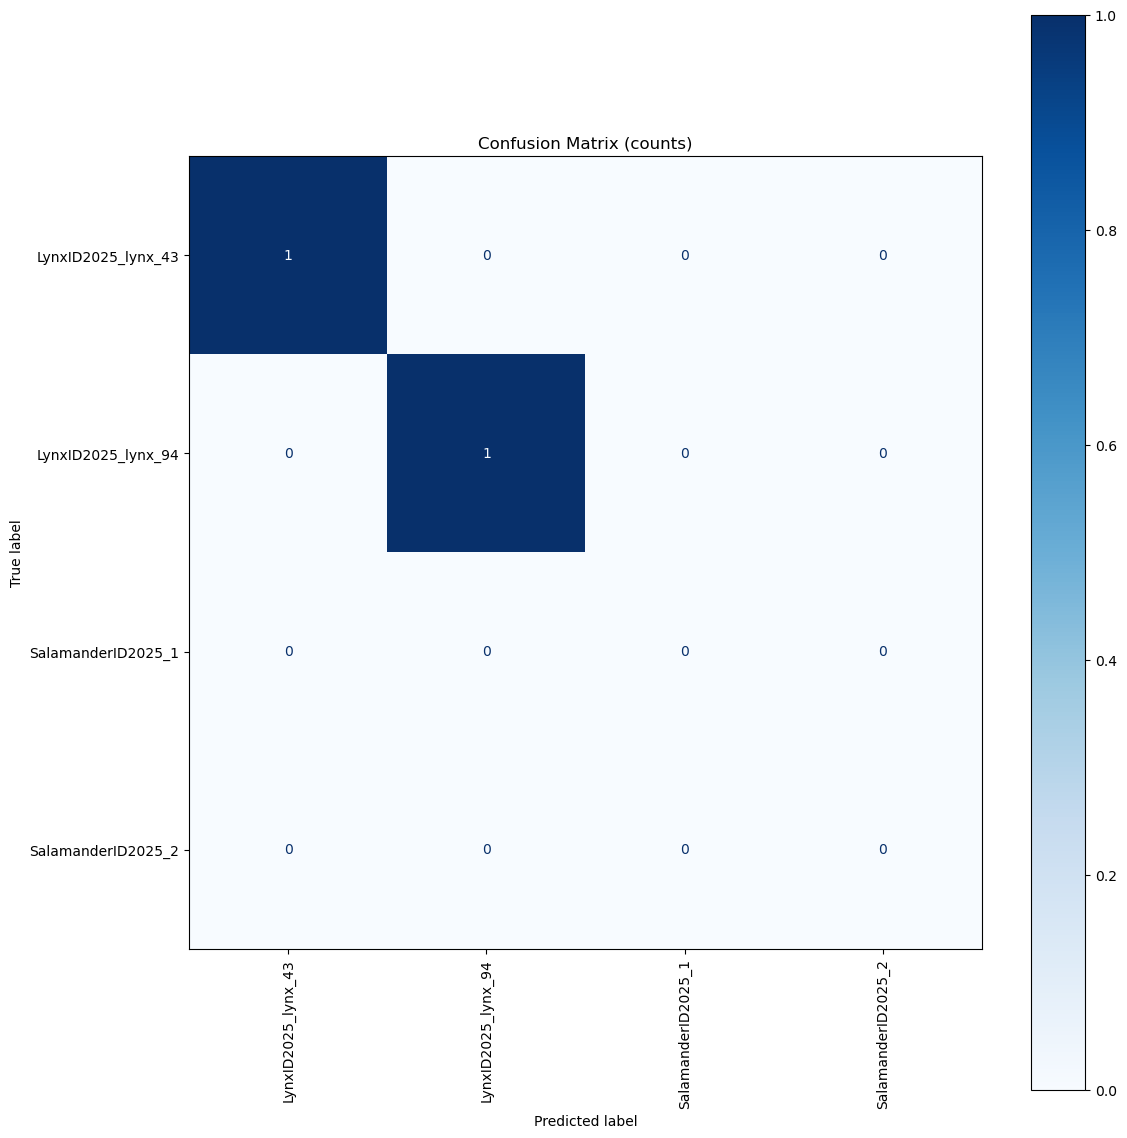

In [29]:
# TESTING with fudged data!


"""
Colab‑friendly fine‑tuning script for WildlifeReID‑10k using DeiT.
-----------------------------------------------------------------
Assumptions
===========
* `final_df` (pandas.DataFrame) already exists in the workspace and has
  two columns:
      - "image_path"  → relative or absolute path of each image
      - "identity"     → class label (string)
* Images are reachable on disk (e.g. copied to /content/training_data/...).
* Runtime has a GPU (T4/V100/A100) and PyTorch/Transformers installed.

If you run this from scratch in Colab:
  1. Upload / prepare `final_df` (or build it with the earlier notebook cells).
  2. Run `!pip install -q transformers timm accelerate` once.
  3. Run this script in a cell (or copy/paste into a new cell).

The script uses:
  • early stopping (patience)
  • optional backbone freezing for the first epochs (uncomment to thaw)
"""

# ───────────────────────────────── Imports ───────────────────────────────────
final_df = pd.read_csv('full_image_identity.csv')
import os, random, time
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from PIL import Image
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from transformers import (
    AutoImageProcessor,
    DeiTForImageClassification,
)
import matplotlib.pyplot as plt
# ───────────────────────────── Hyper‑parameters ─────────────────────────────
SEED            = 42
numEpochs       = 10          # start small; rely on early stopping
patience        = 3           # stop if val‑acc doesn\'t improve for N epochs
batchSize       = 64          # fits on Colab T4 (≈7 GB)
learningRate    = 1e-4        # higher because backbone is (initially) frozen
weightDecay     = 1e-4
freeze_backbone = True        # set False to train full network from start
threshold = .4


# ───────────────────────────── Reproducibility ──────────────────────────────
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ─────────────────────── Prepare dataframe & label encoder ──────────────────
assert 'final_df' in globals(), "final_df is not defined in the notebook scope"
X = final_df['image_path'].values
le = LabelEncoder()
y = le.fit_transform(final_df['identity'].values)
num_classes = len(le.classes_)

# ───────────────────────── Train / val / test split ─────────────────────────
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=SEED, stratify=y)
X_train, X_val,  y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=SEED, stratify=y_temp)
print(f"Train: {len(X_train)}  |  Val: {len(X_val)}  |  Test: {len(X_test)}")

# ───────────────────────────── Data‑set object ──────────────────────────────
class AnimalDataset(Dataset):
    def __init__(self, image_paths, labels, processor):
        self.image_paths = image_paths
        self.labels = labels
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        inputs = self.processor(images=img, return_tensors="pt")
        inputs = {k: v.squeeze(0) for k, v in inputs.items()}
        inputs["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return inputs

# ─────────────────────────── Model & Optimiser ──────────────────────────────
image_processor = AutoImageProcessor.from_pretrained("facebook/deit-base-distilled-patch16-224")
model = DeiTForImageClassification.from_pretrained(
    "facebook/deit-base-distilled-patch16-224",
    num_labels=num_classes,
    id2label={i: lbl for i, lbl in enumerate(le.classes_)},
    label2id={lbl: i for i, lbl in enumerate(le.classes_)},
)

if freeze_backbone:
    for p in model.deit.parameters():
        p.requires_grad = False
    print("Backbone frozen → only classifier head will train for now")

model.to(device)
optimizer = AdamW(model.parameters(), lr=learningRate, weight_decay=weightDecay)

# ───────────────────────────── Dataloaders ──────────────────────────────────
train_ds = AnimalDataset(X_train, y_train, image_processor)
val_ds   = AnimalDataset(X_val,   y_val,   image_processor)

train_dl = DataLoader(train_ds, batch_size=batchSize, shuffle=True)
val_dl   = DataLoader(val_ds,   batch_size=batchSize)

test_ds = AnimalDataset(X_test, y_test, image_processor)
test_dl = DataLoader(test_ds, batch_size=batchSize)

# ───────────────────────────── Training loop ───────────────────────────────
best_val_acc = 0.0
no_improve   = 0

for epoch in range(1, numEpochs + 1):
    # ── Training ──
    model.train()
    running_loss = 0.0

    for batch in tqdm(train_dl, desc=f"Epoch {epoch}"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dl)

    # ── Validation ──

    
    model.eval()
    val_loss = correct = total = 0
    with torch.no_grad():
        for batch in val_dl:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            val_loss += outputs.loss.item()
            preds = outputs.logits.argmax(dim=1)
            correct += (preds == batch['labels']).sum().item()
            total += preds.size(0)
    val_loss /= len(val_dl)
    val_acc = correct / total

    print(f"Epoch {epoch:02d} │ train‑loss {train_loss:.4f} │ val‑loss {val_loss:.4f} │ val‑acc {val_acc:.4f}")

    # ── Early stop / checkpoint ──
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        no_improve = 0
        torch.save(model.state_dict(), "best_model.pt")
        print("✓ saved new best model")
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping (no val‑improvement for", patience, "epochs)")
            break

# ───────────────────────────── Testing phase ───────────────────────────────
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for batch in tqdm(test_dl, desc="Testing"):
        labels = batch["labels"].cpu().numpy()
        batch = {k: v.to(device) for k, v in batch.items()}
        logits = model(**batch).logits                  
        probs  = torch.softmax(logits, dim=1)          
        max_probs, pred_idxs = probs.max(dim=1)        

        for true_idx, pred_idx, prob in zip(labels, pred_idxs.cpu(), max_probs.cpu()):
            y_true.append(le.classes_[true_idx])
            if prob.item() < threshold:
               y_pred.append("new_identity")
            else:
               y_pred.append(le.classes_[pred_idx.item()])


print("\nTest Classification Report:")
print(classification_report(y_true, y_pred))

labels = le.classes_                   # your class names in order
cm = confusion_matrix(y_true, y_pred, labels=labels)

# 2. Plot the raw counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(12,12))      # adjust size as needed
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
ax.set_title("Confusion Matrix (counts)")
plt.tight_layout()
plt.show()
# cm = metric.confusion_matrix(y_true, y_pred)
# cm_display = metrics.ConfusionMatrixDisplay(cm, [0,1])

# cm_display.plot()
# plt.show()


In [28]:
labels = le.classes_                   # your class names in order
cm = confusion_matrix(y_true, y_pred, labels=labels)

# 2. Plot the raw counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(12,12))      # adjust size as needed
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
ax.set_title("Confusion Matrix (counts)")
plt.tight_layout()
plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined

In [1]:
# Chat code

"""
Colab‑friendly fine‑tuning script for WildlifeReID‑10k using DeiT.
-----------------------------------------------------------------
Assumptions
===========
* `final_df` (pandas.DataFrame) already exists in the workspace and has
  two columns:
      - "image_path"  → relative or absolute path of each image
      - "identity"     → class label (string)
* Images are reachable on disk (e.g. copied to /content/training_data/...).
* Runtime has a GPU (T4/V100/A100) and PyTorch/Transformers installed.

If you run this from scratch in Colab:
  1. Upload / prepare `final_df` (or build it with the earlier notebook cells).
  2. Run `!pip install -q transformers timm accelerate` once.
  3. Run this script in a cell (or copy/paste into a new cell).

The script uses:
  • early stopping (patience)
  • optional backbone freezing for the first epochs (uncomment to thaw)
"""

# ───────────────────────────────── Imports ───────────────────────────────────
import os, random, time
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from PIL import Image
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from transformers import (
    AutoImageProcessor,
    DeiTForImageClassification,
)


final_df = pd.read_csv('training_data/full_image_identity.csv')

SEED            = 42
numEpochs       = 10          # start small; rely on early stopping
patience        = 3           # stop if val‑acc doesn\'t improve for N epochs
batchSize       = 32          # fits on Colab T4 (≈7 GB)
learningRate    = 1e-4        # higher because backbone is (initially) frozen
weightDecay     = 1e-4
freeze_backbone = True        # set False to train full network from start
threshold = .4

# ───────────────────────────── Reproducibility ──────────────────────────────
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ─────────────────────── Prepare dataframe & label encoder ──────────────────
assert 'final_df' in globals(), "final_df is not defined in the notebook scope"
X = final_df['image_path'].values
le = LabelEncoder()
y = le.fit_transform(final_df['identity'].values)
num_classes = len(le.classes_)

# ───────────────────────── Train / val / test split ─────────────────────────
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train, X_val,  y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1875, random_state=SEED)
print(f"Train: {len(X_train)}  |  Val: {len(X_val)}  |  Test: {len(X_test)}")

# ───────────────────────────── Data‑set object ──────────────────────────────
class AnimalDataset(Dataset):
    def __init__(self, image_paths, labels, processor):
        self.image_paths = image_paths
        self.labels = labels
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        inputs = self.processor(images=img, return_tensors="pt")
        inputs = {k: v.squeeze(0) for k, v in inputs.items()}
        inputs["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return inputs

# ─────────────────────────── Model & Optimiser ──────────────────────────────
image_processor = AutoImageProcessor.from_pretrained("facebook/deit-base-distilled-patch16-224", use_fast=True)
model = DeiTForImageClassification.from_pretrained(
    "facebook/deit-base-distilled-patch16-224",
    num_labels=num_classes,
    id2label={i: lbl for i, lbl in enumerate(le.classes_)},
    label2id={lbl: i for i, lbl in enumerate(le.classes_)},
)

if freeze_backbone:
    for p in model.deit.parameters():
        p.requires_grad = False
    print("Backbone frozen → only classifier head will train for now")

model.to(device)
optimizer = AdamW(model.parameters(), lr=learningRate, weight_decay=weightDecay)

# ───────────────────────────── Dataloaders ──────────────────────────────────
train_ds = AnimalDataset(X_train, y_train, image_processor)
val_ds   = AnimalDataset(X_val,   y_val,   image_processor)

train_dl = DataLoader(train_ds, batch_size=batchSize, shuffle=True)
val_dl   = DataLoader(val_ds,   batch_size=batchSize)

test_ds = AnimalDataset(X_test, y_test, image_processor)
test_dl = DataLoader(test_ds, batch_size=batchSize)

# ───────────────────────────── Training loop ───────────────────────────────
best_val_acc = 0.0
no_improve   = 0

for epoch in range(1, numEpochs + 1):
    # ── Training ──
    model.train()
    running_loss = 0.0

    for batch in tqdm(train_dl, desc=f"Epoch {epoch}"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dl)

    # ── Validation ──

    
    model.eval()
    val_loss = correct = total = 0
    with torch.no_grad():
        for batch in val_dl:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            val_loss += outputs.loss.item()
            preds = outputs.logits.argmax(dim=1)
            correct += (preds == batch['labels']).sum().item()
            total += preds.size(0)
    val_loss /= len(val_dl)
    val_acc = correct / total

    print(f"Epoch {epoch:02d} │ train‑loss {train_loss:.4f} │ val‑loss {val_loss:.4f} │ val‑acc {val_acc:.4f}")

    # ── Early stop / checkpoint ──
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        no_improve = 0
        torch.save(model.state_dict(), "best_model.pt")
        print("✓ saved new best model")
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping (no val‑improvement for", patience, "epochs)")
            break

# ───────────────────────────── Testing phase ───────────────────────────────
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for batch in tqdm(test_dl, desc="Testing"):
        labels = batch["labels"].cpu().numpy()
        batch = {k: v.to(device) for k, v in batch.items()}
        logits = model(**batch).logits                  
        probs  = torch.softmax(logits, dim=1)          
        max_probs, pred_idxs = probs.max(dim=1)        

        for true_idx, pred_idx, prob in zip(labels, pred_idxs.cpu(), max_probs.cpu()):
            y_true.append(le.classes_[true_idx])
            if prob.item() < threshold:
               y_pred.append("new_identity")
            else:
               y_pred.append(le.classes_[pred_idx.item()])


print("\nTest Classification Report:")
print(classification_report(y_true, y_pred))



Using device: cpu
Train: 2824  |  Val: 652  |  Test: 869


Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Backbone frozen → only classifier head will train for now


Epoch 1:   0%|          | 0/89 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#Order of operations

#Data Section
#Remove/figure out labeling for all data without 'identity' ~1388 datapoints
#Perform data augmentation (keras is an example) to rotate, shift, etc. the data to increase our dataset from around 13k to 150k
#Make sure even distribution of datapoints to prevent model bias towards one output

#Model
#Use a vision transformer from Kaggle: our choice right now; Deit-B: https://huggingface.co/docs/transformers/en/model_doc/deit#transformers.DeiTModel
#Download weights and use ~65% of our data on training to finetune the model towards our use case

#Eval: Use relevant evaluation metrics, look at gradients to ensure they are being optimized, overall accuracy, Precision / Recall / F1-score, confusion matrix

TODO:

1. Data Preprocessing (Krish + Rithvik)
  - Augment to create 30000 of each (Rithvik)
    - Scale up through augmentation
    - Cut aka load balance so 30000 of each species
  - Load in second dataset of unknown (Krish)
    - Select 30000 animals
      - Not lynx, sala, turts
  - Train, test, val split
    - There's a fn to do this
2. Create the model (Aneetej)
  - Vit hugging face
  - Input 120000 images, output 1 of 4 classes
    - Using softmax
    - 4 classes: new_individual + 3 species
3. Evaluation metrics
4. Fine tuning of hyper parameters